# Single Layer Perceptron by Nadhifa Sofia

A single layer perceptron (SLP) is a feed-forward network based on a threshold transfer function. SLP is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target (1 , 0).

 # Import All Libraries Needed

In [1]:
#import dataframe and plot library
import pandas as pd
import matplotlib.pyplot as plt
import math

# Binary-Classification using Linear Classification

Using The part of Iris data (2 classes and two features, choosen by yourself => 100 data). http://archive.ics.uci.edu/ml/datasets/iris 
___

1. Load the Iris data from scikit learn and divide the data into two parts: training and test data with ration 80:20. Make sure that the class within each parts of the data is balance. (score: 0.5)

In [2]:
#initialize the data
cols = ['x1','x2','x3','x4','class','binary','t1','t2','t3','t4','bias','target','sigmoid','prediction','error','dt1','dt2','dt3','dt4','dbias']
df_training = pd.read_csv('iris.data', header=None, names=cols)
#to choose 100 first data
df_training.head(100)
df_training = df_training.head(100)

#to generate 2 classes, i chose these
for i in range(100):
    if df_training.at[i,'class']=='Iris-versicolor':
        df_training.at[i,'binary'] = 0
    elif df_training.at[i,'class']=='Iris-virginica':
        df_training.at[i,'binary'] = 1

#divide data into k-fold, 100 epoch
df_k1 = df_training.iloc[0:80]
df_epoch_1 = df_k1
for i in range(0,99):
    df_k1 = df_k1.append(df_epoch_1,ignore_index=True, sort=False)
df_k1_validation = df_training.iloc[80:100]
df_k1_validation = df_k1_validation.reset_index(drop=True)

# Iris Dataset Visualization

2. Using scatter plot (matplotlib), visualise the Iris data (training part only) (score: 0.5)

([], <a list of 0 Text yticklabel objects>)

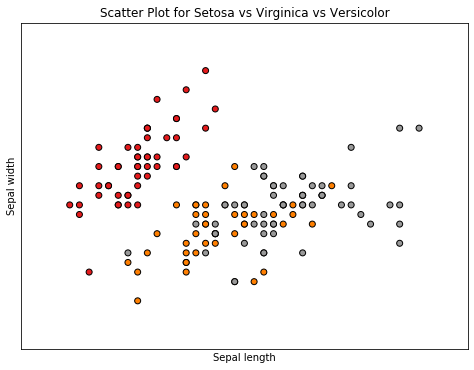

In [3]:
# import some data to play with
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter Plot for Setosa vs Virginica vs Versicolor')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
plt.xticks(())
plt.yticks(())

In [4]:
#for k-fold validation
df_k2 = df_training.iloc[0:60]
df_k2 = df_k2.append(df_training.iloc[80:100],ignore_index=True, sort=False)
df_epoch_2 = df_k2
for i in range(0,99):
    df_k2 = df_k2.append(df_epoch_2,ignore_index=True, sort=False)
df_k2_validation = df_training.iloc[60:80]
df_k2_validation = df_k2_validation.reset_index(drop=True)

df_k3 = df_training.iloc[0:40]
df_k3 = df_k3.append(df_training.iloc[60:100],ignore_index=True, sort=False)
df_epoch_3 = df_k3
for i in range(0,99):
    df_k3 = df_k3.append(df_epoch_3,ignore_index=True, sort=False)
df_k3_validation = df_training.iloc[40:60]
df_k3_validation = df_k3_validation.reset_index(drop=True)

df_k4 = df_training.iloc[0:20]
df_k4 = df_k4.append(df_training.iloc[40:100],ignore_index=True, sort=False)
df_epoch_4 = df_k4
for i in range(0,99):
    df_k4 = df_k4.append(df_epoch_4,ignore_index=True, sort=False)
df_k4_validation = df_training.iloc[20:40]
df_k4_validation = df_k4_validation.reset_index(drop=True)

df_k5 = df_training.iloc[20:100]
df_epoch_5 = df_k5
for i in range(0,99):
    df_k5 = df_k5.append(df_epoch_5,ignore_index=True, sort=False)
df_k5_validation = df_training.iloc[0:20]
df_k5_validation = df_k5_validation.reset_index(drop=True)

In [5]:
#initialize first row of each epoch
df_k1.at[0,'t1'] = df_k1.at[0,'t2'] = df_k1.at[0,'t3'] = df_k1.at[0,'t4']= df_k1.at[0,'bias'] = 0.5
df_k1.at[0,'target']= df_k1.at[0,'x1']*df_k1.at[0,'t1']+df_k1.at[0,'x2']*df_k1.at[0,'t2']+df_k1.at[0,'x3']*df_k1.at[0,'t3']+df_k1.at[0,'x4']*df_k1.at[0,'t4']+df_k1.at[0,'bias']

# Sigmoid Function

3. Define a python function for sigmoid function (score:0.5)
___

By way of example, we have data that is saved into our model; you can see it thru https://bit.ly/slp_csv
- input1 * weight1 = 7.0 * 0.5 = 3.5
- input2 * weight2 = 3.2 * 0.5 = 1.6
- input3 * weight3 = 4.7 * 0.5 = 2.35
- input4 * weight4 = 1.4 * 0.5 = 0.7
- bias = 0.5
- sigma(input * weight) + bias = (3.5+1.6+2.35+0.7) + 0.5 = 8.65
- **sigmoid = 1/(1 + (exp(-8.65))) = 0.9998249038**

In [6]:
def sigmoid(ha):
    return (1/(1+math.exp(-1*ha)))

In [7]:
#sigmoid function can be like this too
df_k1.at[0,'sigmoid']= 1/(1+math.exp(-df_k1.at[0,'target']))
if df_k1.at[0,'sigmoid']>0.5:
    df_k1.at[0,'prediction']= 1
else:
    df_k1.at[0,'prediction']= 0

# Error Function

4. Define a python function of the cost function (score:0.5)
___
**Error = (0 - sigmoid)^2 = (0 - 0.9998249038) ^ 2 = 0.9996498383**

In [8]:
def local_error(a,b):
    return math.fabs((a-b))

In [9]:
#error function can be like this too
df_k1.at[0,'error']= math.pow(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'],2)

# Gradient Descent Algorithm

5. Define a python function for the Gradient Descent algorithm (score: 0.5)
___

Error calculation is really crucial to update the weight. I minimize error value by finding the best weight for every input or in mathematical way is known as "Stochastic Gradient Descent (SGD)".

- **new_weight = weight - learning_rate * (dError/dWeight)**
- **dError/dWeight = (dError/dSigmoid) * (dSigmoid/dSigma) * (dSigma/dWeight)**
- **dError/dWeight = -2 * (Target-Sigmoid) * Sigmoid * (1-Sigmoid) * Input**
___

- dError/dWeight1 = (-2*(0.99) * 0.99 * (1-0.99) * 7.0 = 0.0024
- dError/dWeight2 = (-2*(0.99) * 0.99 * (1-0.99) * 3.2 = 0.0011
- dError/dWeight3 = (-2*(0.99) * 0.99 * (1-0.99) * 4.7 = 0.0016
- dError/dWeight4 = (-2*(0.99) * 0.99 * (1-0.99) * 1.4 = 0.0004
- dError/dBias    = (-2*(0.99) * 0.99 * (1-0.99) = 0.00035


By using SGD, I get new_weight for every input;
- new_weight1 = 0.5 - 0.1 * 0.0024 = 0.4997549512
- new_weight2 = 0.5 - 0.1 * 0.0011 = 0.4998879777
- new_weight3 = 0.5 - 0.1 * 0.0016 = 0.4998354672
- new_weight4 = 0.5 - 0.1 * 0.0004 = 0.4999509902
- bias = 0.5 - 0.1 * 0.00035 = 0.499964993

In [10]:
def sgd(g, y, x):
    return (2*(g-y)*(1-g)*g*x)

In [11]:
#SGD can be like this too 
df_k1.at[0,'dt1']= 2*df_k1.at[0,'x1']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dt2']= 2*df_k1.at[0,'x2']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dt3']= 2*df_k1.at[0,'x3']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dt4']= 2*df_k1.at[0,'x4']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dbias']= 2*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']

In [12]:
#for another k-fold
df_k2.at[0,'t1'] = df_k2.at[0,'t2'] = df_k2.at[0,'t3'] = df_k2.at[0,'t4']=  df_k2.at[0,'bias'] = 0.5 

df_k2.at[0,'target']= df_k2.at[0,'x1']*df_k2.at[0,'t1']+df_k2.at[0,'x2']*df_k2.at[0,'t2']+df_k2.at[0,'x3']*df_k2.at[0,'t3']+df_k2.at[0,'x4']*df_k2.at[0,'t4']+df_k2.at[0,'bias']
df_k2.at[0,'sigmoid']= 1/(1+math.exp(-df_k2.at[0,'target']))
if df_k2.at[0,'sigmoid']>0.5:
    df_k2.at[0,'prediction']= 1
else:
    df_k2.at[0,'prediction']= 0   
df_k2.at[0,'error']= math.pow(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'],2)
df_k2.at[0,'dt1']= 2*df_k2.at[0,'x1']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dt2']= 2*df_k2.at[0,'x2']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dt3']= 2*df_k2.at[0,'x3']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dt4']= 2*df_k2.at[0,'x4']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dbias']= 2*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']



df_k3.at[0,'t1'] = df_k3.at[0,'t2'] = df_k3.at[0,'t3'] = df_k3.at[0,'t4']=  df_k3.at[0,'bias'] = 0.5

df_k3.at[0,'target']= df_k3.at[0,'x1']*df_k3.at[0,'t1']+df_k3.at[0,'x2']*df_k3.at[0,'t2']+df_k3.at[0,'x3']*df_k3.at[0,'t3']+df_k3.at[0,'x4']*df_k3.at[0,'t4']+df_k3.at[0,'bias']
df_k3.at[0,'sigmoid']= 1/(1+math.exp(-df_k3.at[0,'target']))
if df_k3.at[0,'sigmoid']>0.5:
    df_k3.at[0,'prediction']= 1
else:
    df_k3.at[0,'prediction']= 0   
df_k3.at[0,'error']= math.pow(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'],2)
df_k3.at[0,'dt1']= 2*df_k3.at[0,'x1']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dt2']= 2*df_k3.at[0,'x2']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dt3']= 2*df_k3.at[0,'x3']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dt4']= 2*df_k3.at[0,'x4']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dbias']= 2*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']



df_k4.at[0,'t1'] = df_k4.at[0,'t2'] = df_k4.at[0,'t3'] = df_k4.at[0,'t4']= df_k4.at[0,'bias'] = 0.5

df_k4.at[0,'target']= df_k4.at[0,'x1']*df_k4.at[0,'t1']+df_k4.at[0,'x2']*df_k4.at[0,'t2']+df_k4.at[0,'x3']*df_k4.at[0,'t3']+df_k4.at[0,'x4']*df_k4.at[0,'t4']+df_k4.at[0,'bias']
df_k4.at[0,'sigmoid']= 1/(1+math.exp(-df_k4.at[0,'target']))
if df_k4.at[0,'sigmoid']>0.5:
    df_k4.at[0,'prediction']= 1
else:
    df_k4.at[0,'prediction']= 0   
df_k4.at[0,'error']= math.pow(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'],2)
df_k4.at[0,'dt1']= 2*df_k4.at[0,'x1']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dt2']= 2*df_k4.at[0,'x2']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dt3']= 2*df_k4.at[0,'x3']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dt4']= 2*df_k4.at[0,'x4']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dbias']= 2*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']



df_k5.at[0,'t1'] = df_k5.at[0,'t2'] = df_k5.at[0,'t3'] = df_k5.at[0,'t4']= df_k5.at[0,'bias'] = 0.5

df_k5.at[0,'target']= df_k5.at[0,'x1']*df_k5.at[0,'t1']+df_k5.at[0,'x2']*df_k5.at[0,'t2']+df_k5.at[0,'x3']*df_k5.at[0,'t3']+df_k5.at[0,'x4']*df_k5.at[0,'t4']+df_k5.at[0,'bias']
df_k5.at[0,'sigmoid']= 1/(1+math.exp(-df_k5.at[0,'target']))
if df_k5.at[0,'sigmoid']>0.5:
    df_k5.at[0,'prediction']= 1
else:
    df_k5.at[0,'prediction']= 0   
df_k5.at[0,'error']= math.pow(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'],2)
df_k5.at[0,'dt1']= 2*df_k5.at[0,'x1']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dt2']= 2*df_k5.at[0,'x2']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dt3']= 2*df_k5.at[0,'x3']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dt4']= 2*df_k5.at[0,'x4']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dbias']= 2*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']

#k-fold run, learning rate learningrate
%matplotlib inline
counter=1
correcttraining=0
correctvalidate=0

ploterrortrain = []
ploterrorvalidate = []
plotcorrecttrain = []
plotcorrectvalidate = []
plotcounter = []


inputs = input("input k-fold index: ")
inputs = int(inputs)

if inputs == 1:
    df = df_k1
    dfv = df_k1_validation
elif inputs == 2:
    df = df_k2
    dfv = df_k2_validation
elif inputs == 3:
    df = df_k3
    dfv = df_k3_validation
elif inputs == 4:
    df = df_k4
    dfv = df_k4_validation
elif inputs == 5:
    df = df_k5
    dfv = df_k5_validation
else:
    print("range 1-5 only")

input k-fold index: 2


# Train the Neural Network - SLP

6. Train your NN-SLP algorithm on the training data, set learning rate: 0.001 and maximum iteration: 100 (score: 0.5)

In machine learning, epoch = iteration for training process. I just combine the training data with the same training dataset + use the recent weight and bias that I got before from previous epoch.
The full journey is at https://bit.ly/slp_csv

7. Find thetha(s) that minimize the cost function, and plot the decision boundary using matplotlib.  (score: 1.0)

input learning rate: 0.001


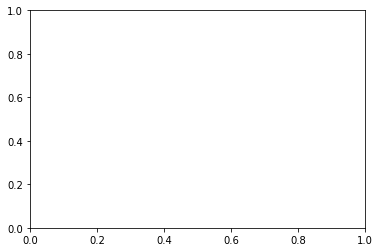

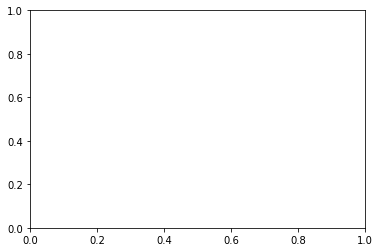

In [14]:
learningrate = input("input learning rate: ")
learningrate = float(learningrate)


fig, plotaccuracy = plt.subplots()
fig, ploterror = plt.subplots()

for i in range(1,df.shape[0]):
    counter = counter + 1
    df.at[i,'t1'] = df.at[i-1,'t1']+learningrate*df.at[i-1,'dt1']
    df.at[i,'t2'] = df.at[i-1,'t2']+learningrate*df.at[i-1,'dt2']
    df.at[i,'t3'] = df.at[i-1,'t3']+learningrate*df.at[i-1,'dt3']
    df.at[i,'t4'] = df.at[i-1,'t4']+learningrate*df.at[i-1,'dt4']
    df.at[i,'bias'] = df.at[i-1,'bias']+learningrate*df.at[i-1,'dbias']
    
    df.at[i,'target']= df.at[i,'x1']*df.at[i,'t1']+df.at[i,'x2']*df.at[i,'t2']+df.at[i,'x3']*df.at[i,'t3']+df.at[i,'x4']*df.at[i,'t4']+df.at[i,'bias']
    df.at[i,'sigmoid']= 1/(1+math.exp(-df.at[i,'target']))
    
    if df.at[i,'sigmoid']>0.5:
        df.at[i,'prediction']= 1
    else:
        df.at[i,'prediction']= 0
    
    df.at[i,'error']= math.pow(df.at[i,'binary']-df.at[i,'sigmoid'],2)
    df.at[i,'dt1']= 2*df.at[i,'x1']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dt2']= 2*df.at[i,'x2']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dt3']= 2*df.at[i,'x3']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dt4']= 2*df.at[i,'x4']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dbias']= 2*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    
    if df.at[i,'prediction'] == df.at[i,'binary'] :
        correcttraining = correcttraining + 1

    if counter % 80 == 0 : 
        df_validating = dfv
        df_validating.at[0,'t1'] = df.at[i,'t1']
        df_validating.at[0,'t2'] = df.at[i,'t2']
        df_validating.at[0,'t3'] = df.at[i,'t3']
        df_validating.at[0,'t4'] = df.at[i,'t4']
        df_validating.at[0,'bias'] = df.at[i,'bias']
        df_validating.at[0,'target'] = df.at[i,'target']
        df_validating.at[0,'sigmoid'] = df.at[i,'sigmoid']
        df_validating.at[0,'prediction'] = df.at[i,'prediction']
        df_validating.at[0,'error'] = df.at[i,'error']
        df_validating.at[0,'dt1'] = df.at[i,'dt1']
        df_validating.at[0,'dt2'] = df.at[i,'dt2']
        df_validating.at[0,'dt3'] = df.at[i,'dt3']
        df_validating.at[0,'dt4'] = df.at[i,'dt4']
        df_validating.at[0,'dbias'] = df.at[i,'dbias']
        
        ploterrortrain.append(df_validating.at[0,'error'])
        
        for i in range(1,df_validating.shape[0]):

            df_validating.at[i,'t1'] = df_validating.at[i-1,'t1']+learningrate*df_validating.at[i-1,'dt1']
            df_validating.at[i,'t2'] = df_validating.at[i-1,'t2']+learningrate*df_validating.at[i-1,'dt2']
            df_validating.at[i,'t3'] = df_validating.at[i-1,'t3']+learningrate*df_validating.at[i-1,'dt3']
            df_validating.at[i,'t4'] = df_validating.at[i-1,'t4']+learningrate*df_validating.at[i-1,'dt4']
            df_validating.at[i,'bias'] = df_validating.at[i-1,'bias']+learningrate*df_validating.at[i-1,'dbias']

            df_validating.at[i,'target']= df_validating.at[i,'x1']*df_validating.at[i,'t1']+df_validating.at[i,'x2']*df_validating.at[i,'t2']+df_validating.at[i,'x3']*df_validating.at[i,'t3']+df_validating.at[i,'x4']*df_validating.at[i,'t4']+df_validating.at[i,'bias']
            df_validating.at[i,'sigmoid']= 1/(1+math.exp(-df_validating.at[i,'target']))
            
            if df_validating.at[i,'sigmoid']>0.5:
                df_validating.at[i,'prediction']= 1
            else:
                df_validating.at[i,'prediction']= 0   
                
            df_validating.at[i,'error']= math.pow(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'],2)
            df_validating.at[i,'dt1']= 2*df_validating.at[i,'x1']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dt2']= 2*df_validating.at[i,'x2']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dt3']= 2*df_validating.at[i,'x3']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dt4']= 2*df_validating.at[i,'x4']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dbias']= 2*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']

            if df_validating.at[i,'prediction'] == df_validating.at[i,'binary'] :
                correctvalidate = correctvalidate+1
        
        ploterrorvalidate.append(df_validating.at[19,'error'] )
        #print("correct training: ",correcttraining, "correct validate: ",correctvalidate,"\n")
        plotcorrecttrain.append(100*correcttraining/80)
        plotcorrectvalidate.append(100*correctvalidate/19)
        plotcounter.append(counter/80)
        
        correcttraining = correctvalidate = 0

# Testing Process

8. Test your Linear Classifier on the test data, and calculate the accuracy (score: 0.5)

In [15]:
print("K-1 Learning Rate: ",learningrate," Epochs:100")
plotaccuracy.plot(plotcounter, plotcorrecttrain, color="red",label="training")
plotaccuracy.plot(plotcounter, plotcorrectvalidate, color = "green", label = "validation")
plotaccuracy.legend(loc = "lower right") 
plotaccuracy.set_title("Accuracy Diagram")
plotaccuracy.set_xlabel("number of epochs")
plotaccuracy.set_ylabel("accuracy percentage")

K-1 Learning Rate:  0.001  Epochs:100


Text(3.200000000000003, 0.5, 'accuracy percentage')

# Error Function Plot

9. Plot your cost function using matplotlib (cost function vs iteration) (score: 0.5)

input k-fold index: 2
input learning rate: 0.001
K-1 Learning Rate:  0.001  Epochs:100


Text(0, 0.5, 'error percentage')

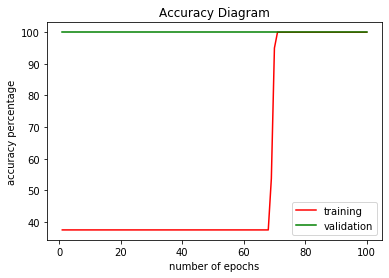

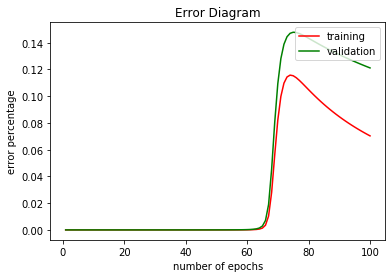

In [17]:
ploterror.plot(plotcounter, ploterrortrain, color = "red",label = "training")
ploterror.plot(plotcounter, ploterrorvalidate, color = "green", label = "validation")
ploterror.legend(loc = "upper right")
ploterror.set_title("Error Diagram")
ploterror.set_xlabel("number of epochs")
ploterror.set_ylabel("error percentage")